In [30]:
!pip install google
!pip install google-search-results
!pip install requests
!pip install bs4
!apt update
!apt install -y cmake
!pip install dlib
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsna

In [31]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy as np

In [32]:
from bs4 import BeautifulSoup
import requests
from serpapi import GoogleSearch

params = {

"q": " face sprite sheet",
"google_domain": "google.com",
"tbm": "isch",
"api_key": "15527c6ac37c44cceed0606525fd6037689832363cd4a789d914ba8b4f37b2a3"
}
search = GoogleSearch(params)
results = search.get_dict()
images_results=results['images_results']
print(images_results)

              #for i in range(len(images_results)):
for i in range(30):
    if 'original' in images_results[i]: 
        images_url = images_results[i]['original']
        print(i, images_url)
        img_data = requests.get(images_url).content     
        with open('img' + str(i+1) + '.jpg', 'wb') as handler: 
            handler.write(img_data)

images_url_1 = images_results[0]['original']
print( images_url)

image_visu=requests.get(images_url_1).content
with open('img_recogntion.jpg', 'wb') as handler:
  handler.write(image_visu)


[{'position': 1, 'thumbnail': 'https://serpapi.com/searches/6455311aa4bb3898dad976de/images/7577dff60bdb8e0675626c5c6d59878eaf97686f5fa19b61da566700d403ad0b.png', 'related_content_id': 'R3lidktnY1l1RDlLS01cIixcIkU4c3g0U1BocU1Hb0NN', 'serpapi_related_content_link': 'https://serpapi.com/search.json?engine=google_images_related_content&gl=us&hl=en&q=+face+sprite+sheet&related_content_id=R3lidktnY1l1RDlLS01cIixcIkU4c3g0U1BocU1Hb0NN', 'source': 'DeviantArt', 'title': 'MC Face Sprite Sheet by Goldfang on DeviantArt', 'link': 'https://www.deviantart.com/goldfang/art/MC-Face-Sprite-Sheet-724089652', 'original': 'https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/9e994dd8-c49f-43ea-8b73-a21aef0de3a7/dbz3r5g-2714b4d9-198c-49b1-b0fc-ec1989a34bd0.png?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMjY0MzczYTVmMGQ0MTVlYTBkMjZlMCIsIm9iaiI6W1t7InBhdGgiOiJcL2ZcLzllOTk0ZGQ4LWM0OWYtNDNlYS04YjczLWEyMWFlZ

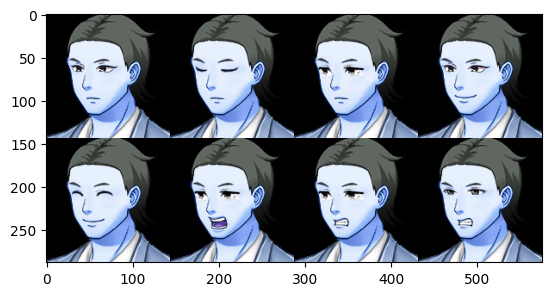

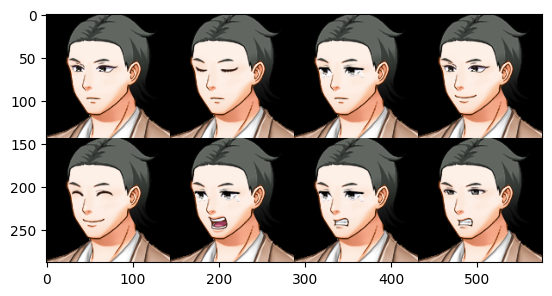

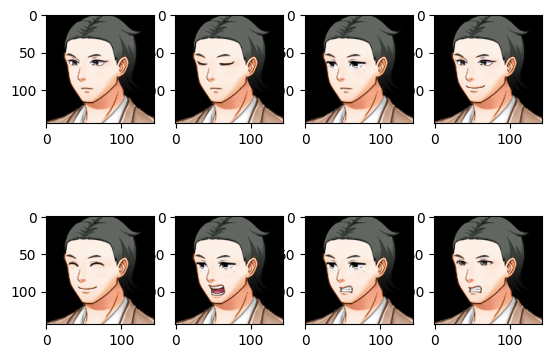

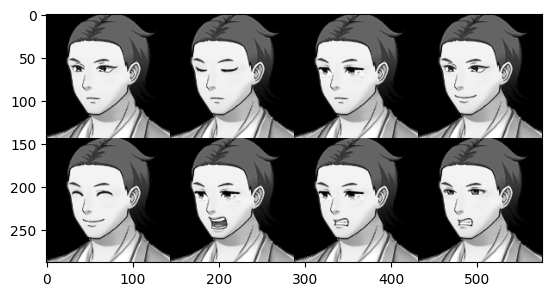

In [33]:
img = cv2.imread('img_recogntion.jpg')
plt.imshow(img)
plt.show()

sec_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(sec_img)
plt.show()

width = sec_img.shape[1] // 4
height = sec_img.shape[0] // 2

crops = []
y = 0
for j in range(2):
    x = 0
    for i in range(4):
        crop = sec_img[y:y+height, x:x+width]
        crops.append(crop)
        x += width
    y += height
    
for i in range(len(crops)):
    plt.subplot(2, 4, i+1)
    plt.imshow(crops[i])
plt.show()

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")


303 179 378 254
13 179 88 254
444 179 519 254
303 38 378 113
444 38 519 113
13 38 88 113
154 179 229 254
162 38 237 113


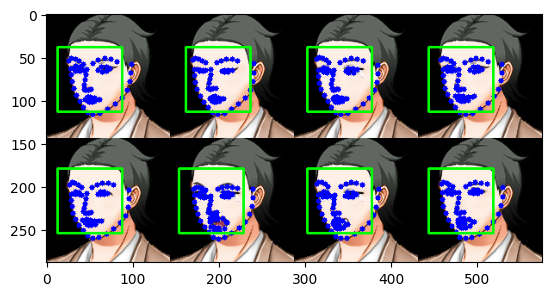

In [34]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
rects = detector(gray_img, 1)

for r in rects:
    x, y, w, h = r.left(), r.top(), r.right()-r.left(), r.bottom()-r.top()
    
    shape = predictor(gray_img, r)
    
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    
  
    for i, (x, y) in enumerate(shape_np):
        cv2.circle(img2, (x, y), 3, (0, 0, 255), -1)

plt.imshow(img2)

for r in rects:
  x = r.tl_corner().x
  y = r.tl_corner().y
  x2 = r.br_corner().x
  y2 = r.br_corner().y
  print (x,y,x2,y2)
  cv2.rectangle(img2, (x, y), (x2, y2), (0, 255, 0), thickness=2)
plt.imshow(img2)